In [1]:
## Python packages - you may have to pip install sqlalchemy, sqlalchemy_utils, and psycopg2.
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2
import pandas as pd
import numpy as np
import math
# The usual preamble
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
plt.rcParams['axes.color_cycle'] = ['r', 'g', 'b', 'c']
plt.rcParams['lines.color'] = 'r'
plt.rcParams['figure.figsize'] = (15, 5)


Populating the interactive namespace from numpy and matplotlib


/Users/along528/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
dbname = 'combined_profiling'
username = 'along528'
pswd = 'password'
con = psycopg2.connect(database = dbname, user = username, host='localhost', password=pswd)

In [3]:
import process
from modeling import categorize
data= process.add_features(process.get_data())


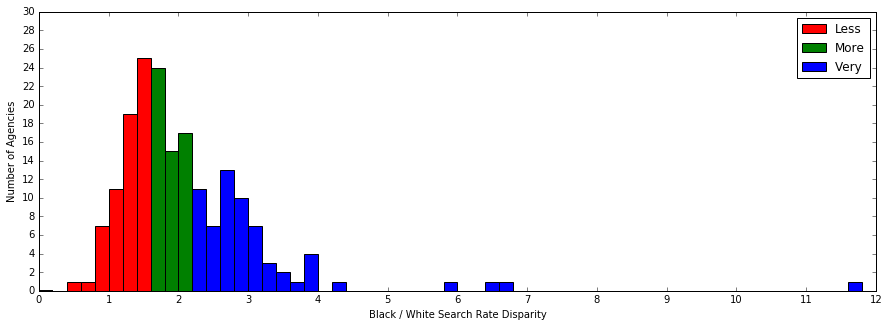

In [10]:
split_rpsi = []
handles = []
labels={}
labels[0]='Less'
labels[1]='More'
labels[2]='Very'
for category in sorted(data['rpsi'].map(categorize).unique().tolist()):
    tmpdata = data[data['rpsi'].map(categorize)==category]
    handle = plt.hist(tmpdata['rpsi'].tolist(),bins=60,range=[0,12],label=labels[category])
    handles.append(labels[category])
plt.ylim([0,30])
plt.locator_params(nbins=20)
plt.legend(handles)
plt.xlabel('Black / White Search Rate Disparity')
plt.ylabel('Number of Agencies')
plt.savefig('images/category_hist.png')
